In [2]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
train_images,test_images=train_images/255.0,test_images/255.0

In [6]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def build_model(hp):
  model=models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units',min_value=32,max_value=128,step=16),(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(hp.Int('conv2_units',min_value=32,max_value=128,step=16),(3,3),activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(hp.Int('conv3_units',min_value=32,max_value=128,step=16),(3,3),activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units',min_value=32,max_value=128,step=16),activation='relu'))
  model.add(layers.Dropout(hp.Float('dropout_rate',min_value=0.0,max_value=0.5,step=0.1)))
  model.add(layers.Dense(10))

  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4]))

  model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

  return model


In [16]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=10,executions_per_trial=1,directory='my_dir',project_name='cifar10')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 00m 55s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.7044000029563904
Total elapsed time: 00h 07m 22s


In [18]:
# Step 7: Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3438 - loss: 1.7697 - val_accuracy: 0.5512 - val_loss: 1.2403
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5707 - loss: 1.2023 - val_accuracy: 0.6300 - val_loss: 1.0619
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6354 - loss: 1.0216 - val_accuracy: 0.6444 - val_loss: 1.0141
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6753 - loss: 0.9145 - val_accuracy: 0.6813 - val_loss: 0.9150
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7111 - loss: 0.8250 - val_accuracy: 0.6614 - val_loss: 0.9879
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7292 - loss: 0.7716 - val_accuracy: 0.7095 - val_loss: 0.8347
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7506 - loss: 0.7059 - val_accuracy: 0.7163 - val_loss: 0.8325
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7661 - loss: 0.663

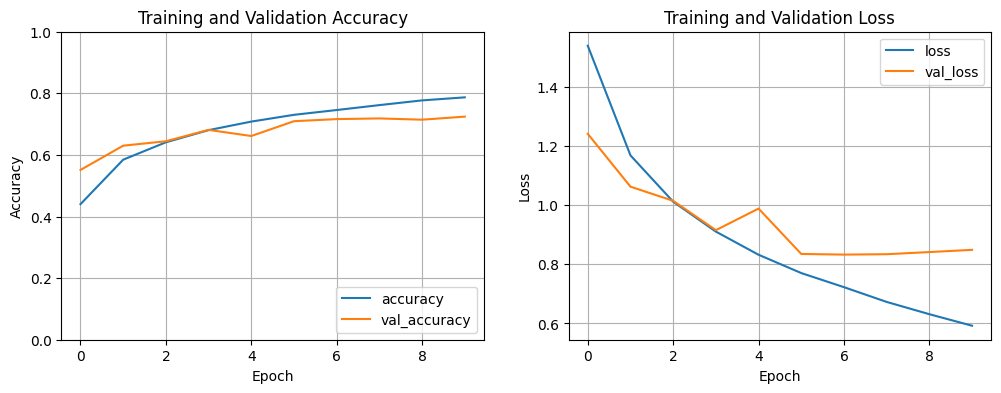

In [19]:
# Step 9: Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()